In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")


In [2]:
data = pd.read_csv(r"Downloads\Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.shape

(200, 5)

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data["Gender"] = data["Gender"].astype("category")

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
data["Gender"] = le.fit_transform(data["Gender"])

In [11]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [12]:
X = data.iloc[:,1:4].values

In [13]:
y = data.iloc[:,4:5].values

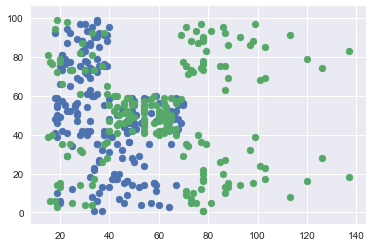

In [14]:
plt.scatter(X[:,1],y);
plt.scatter(X[:,2],y);

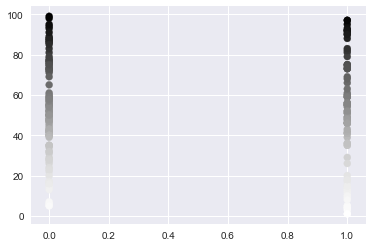

In [15]:
plt.scatter(X[:,0],y,c = y);

In [16]:
data.corr()["Age"]

CustomerID               -0.026763
Gender                    0.060867
Age                       1.000000
Annual Income (k$)       -0.012398
Spending Score (1-100)   -0.327227
Name: Age, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
original_x = data.iloc[:,3:].values

In [19]:
X_train,X_test = train_test_split(original_x,test_size = 0.2,random_state = 90)

In [20]:
from sklearn.cluster import KMeans

In [21]:
dist = []
for i in range(1,11):
    km = KMeans(n_clusters = i)
    km.fit(original_x)
    dist.append(km.inertia_)

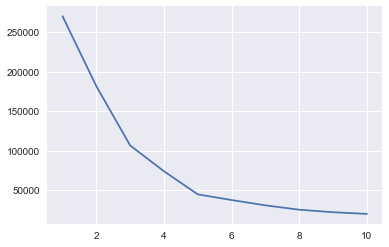

In [22]:
plt.plot(range(1,11),dist);

In [23]:
km1 = KMeans(n_clusters = 5)

In [24]:
y_means = km1.fit_predict(original_x)

In [25]:
y_means

array([2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3,
       2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 0, 4, 3, 4, 0, 4, 0, 4,
       3, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4])

In [26]:
original_x[y_means == 0]

array([[ 70,  29],
       [ 71,  11],
       [ 71,   9],
       [ 73,   5],
       [ 73,   7],
       [ 74,  10],
       [ 75,   5],
       [ 77,  12],
       [ 77,  36],
       [ 78,  22],
       [ 78,  17],
       [ 78,  20],
       [ 78,  16],
       [ 78,   1],
       [ 78,   1],
       [ 79,  35],
       [ 81,   5],
       [ 85,  26],
       [ 86,  20],
       [ 87,  27],
       [ 87,  13],
       [ 87,  10],
       [ 88,  13],
       [ 88,  15],
       [ 93,  14],
       [ 97,  32],
       [ 98,  15],
       [ 99,  39],
       [101,  24],
       [103,  17],
       [103,  23],
       [113,   8],
       [120,  16],
       [126,  28],
       [137,  18]], dtype=int64)

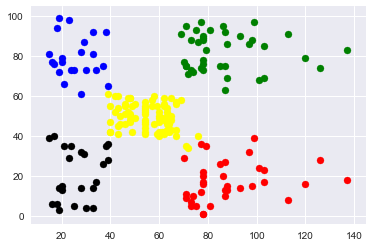

In [27]:
plt.scatter(original_x[y_means == 0,0],original_x[y_means ==0,1],color = "red");
plt.scatter(original_x[y_means == 1,0],original_x[y_means ==1,1],color = "blue");
plt.scatter(original_x[y_means == 2,0],original_x[y_means ==2,1],color = "black");
plt.scatter(original_x[y_means == 3,0],original_x[y_means ==3,1],color = "yellow");
plt.scatter(original_x[y_means == 4,0],original_x[y_means ==4,1],color = "green");